<a href="https://colab.research.google.com/github/AlexZheng000107/QTM350/blob/main/apan5430_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pick a random news article (preferably with many entity mentions) from your Webhose dataset (provided in the Week 2 Assignment), extract named entities using spaCy using a pre-trained language model (e.g., 'en_core_web_sm'), print the named entities in a list of (entity, label) tuples, and visualize the labeled entities using displaCy.

In [1]:
import json
import pandas as pd

#load the dataset into pandas dataframe
f = open("webhose_apple.json")
json_data=f.readlines()
newsfeeds = []
for line in json_data:
    newsfeeds.append(json.loads(line))
f.close()

df = pd.DataFrame(newsfeeds)




In [2]:
# picking the 8th article because it contains many entity menitons
article=df.iloc[7]['text']
print(article)

Mr. Ranjeet Sundher reports
60% OF GLOBAL COBALT SUPPLY AT RISK AS DRC CRACKDOWN INTENSIFIES
Bolt Metals Corp. has noted the Financial Times reported that Huayou Cobalt, "China's top cobalt producer, halts buying from Congo miners." It's widely reported that the Democratic Republic of Congo (the "DRC") represents 60% of global cobalt production.
Shanghai-listed Huayou supplies cobalt to battery makers LG Chem of South Korea and CATL of China, as well as Chinese carmaker BYD and Germany's Volkswagen.
Bowing to international pressure to shutter its conflict-sourced cobalt, Huayou is the latest conglomerate to exit the DRC, joining Apple, Google and several auto manufacturers. Huayou is looking to raise $870m in an effort to expand nickel and cobalt sulphate production in Indonesia. Huayou's plant in Indonesia's Morowali Industrial Park is expected to produce at least 60,000 tonnes of nickel content per year within 2 years.
Ranjeet Sundher, CEO of Bolt Metals, comments, "Cobalt remains an

In [3]:
import spacy
from spacy import displacy

# Load the English language model
nlp = spacy.load('en_core_web_sm')

article_text = article

# Process the article text with spaCy
doc = nlp(article_text)

# Extract named entities and their labels
named_entities = [(ent.text, ent.label_) for ent in doc.ents]

# Print the named entities in (entity, label) tuples
print(named_entities)


[('Ranjeet Sundher', 'PERSON'), ('60%', 'PERCENT'), ('Bolt Metals Corp.', 'ORG'), ('the Financial Times', 'ORG'), ('Huayou Cobalt', 'PERSON'), ('China', 'GPE'), ('Congo', 'GPE'), ('the Democratic Republic of Congo', 'GPE'), ('60%', 'PERCENT'), ('Shanghai', 'GPE'), ('Huayou', 'PRODUCT'), ('LG Chem of South Korea', 'ORG'), ('China', 'GPE'), ('Chinese', 'NORP'), ('BYD', 'ORG'), ('Germany', 'GPE'), ('Volkswagen', 'ORG'), ('Huayou', 'PERSON'), ('DRC', 'ORG'), ('Apple', 'ORG'), ('Google', 'ORG'), ('870', 'MONEY'), ('Indonesia', 'GPE'), ('Huayou', 'PERSON'), ('Indonesia', 'GPE'), ('Morowali Industrial Park', 'GPE'), ('at least 60,000', 'CARDINAL'), ('2 years', 'DATE'), ('Ranjeet Sundher', 'PERSON'), ('Bolt Metals', 'ORG'), ('Bolt Metals', 'PERSON'), ('Indonesia', 'GPE'), ('Cyclops', 'ORG'), ('2018-19', 'DATE'), ('Indonesia', 'GPE'), ('Bolt Metals', 'ORG'), ('Cyclops', 'ORG'), ('Indonesia', 'GPE'), ('China', 'GPE'), ('Bolt Metals', 'ORG'), ('Beijing Easpring', 'ORG'), ('China', 'GPE'), ('Compa

In [4]:
#visualize named entities
displacy.render(doc, style="ent", jupyter=True)

2. Follow directions to set up one of the Information Extraction services below, and write a Python program implementing API calls to extract Company/Organization and Geo entities from  the article chosen in Step 1. Print all the recognized entities in (entity, label) tuple format.

In [ ]:
import os
from google.cloud import language_v1

json_key_path = '/content/key.json'
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = json_key_path

# Create a client for the Google Natural Language API
client = language_v1.LanguageServiceClient()

content = article

# Specify the document type and content
document = language_v1.Document(content=content, type_=language_v1.Document.Type.PLAIN_TEXT)

# Analyze entities
response = client.analyze_entities(document=document, encoding_type=language_v1.EncodingType.UTF8)

# Extract only Location and Organization entities
location_entities = [(entity.name, language_v1.Entity.Type(entity.type).name) for entity in response.entities if entity.type == language_v1.Entity.Type.LOCATION]
organization_entities = [(entity.name, language_v1.Entity.Type(entity.type).name) for entity in response.entities if entity.type == language_v1.Entity.Type.ORGANIZATION]

# Print Location entities
print("Location Entities:")
print(location_entities)

# Print Organization entities
print("Organization Entities:")
print(organization_entities)

3. Use the Class Exercise B NER Download Class Exercise B NER notebook as a reference to:
!pip install spacy
update TRAIN_DATA with annotations of entities (PERSON, LOCATION, or ORGANIZATION) from each sentence in the article selected in step 1
train a blank SpaCy nlp pipeline using the TRAIN_DATA
use trained nlp to test entity recognition on another random news article from Webhose and print the entities in a list of (entity, label) tuples, and visualize these entities using displaCy.

In [6]:
import re

In [8]:
import nltk
nltk.download('punkt')  # Download necessary data (if not already downloaded)

from nltk.tokenize import sent_tokenize

# Your input text
text = article
# Split the text into sentences
sentences = sent_tokenize(text)

# Store the sentences in a list
sents = sentences

# Print the list of sentences
for sentence in sents:
    print(sentence)


Mr. Ranjeet Sundher reports
60% OF GLOBAL COBALT SUPPLY AT RISK AS DRC CRACKDOWN INTENSIFIES
Bolt Metals Corp. has noted the Financial Times reported that Huayou Cobalt, "China's top cobalt producer, halts buying from Congo miners."
It's widely reported that the Democratic Republic of Congo (the "DRC") represents 60% of global cobalt production.
Shanghai-listed Huayou supplies cobalt to battery makers LG Chem of South Korea and CATL of China, as well as Chinese carmaker BYD and Germany's Volkswagen.
Bowing to international pressure to shutter its conflict-sourced cobalt, Huayou is the latest conglomerate to exit the DRC, joining Apple, Google and several auto manufacturers.
Huayou is looking to raise $870m in an effort to expand nickel and cobalt sulphate production in Indonesia.
Huayou's plant in Indonesia's Morowali Industrial Park is expected to produce at least 60,000 tonnes of nickel content per year within 2 years.
Ranjeet Sundher, CEO of Bolt Metals, comments, "Cobalt remains an

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(sents)

['Mr. Ranjeet Sundher reports\n60% OF GLOBAL COBALT SUPPLY AT RISK AS DRC CRACKDOWN INTENSIFIES\nBolt Metals Corp. has noted the Financial Times reported that Huayou Cobalt, "China\'s top cobalt producer, halts buying from Congo miners."', 'It\'s widely reported that the Democratic Republic of Congo (the "DRC") represents 60% of global cobalt production.', "Shanghai-listed Huayou supplies cobalt to battery makers LG Chem of South Korea and CATL of China, as well as Chinese carmaker BYD and Germany's Volkswagen.", 'Bowing to international pressure to shutter its conflict-sourced cobalt, Huayou is the latest conglomerate to exit the DRC, joining Apple, Google and several auto manufacturers.', 'Huayou is looking to raise $870m in an effort to expand nickel and cobalt sulphate production in Indonesia.', "Huayou's plant in Indonesia's Morowali Industrial Park is expected to produce at least 60,000 tonnes of nickel content per year within 2 years.", 'Ranjeet Sundher, CEO of Bolt Metals, comm

In [ ]:
re.search(r'Bolt Metals Corp', sents[0])

<re.Match object; span=(93, 109), match='Bolt Metals Corp'>

In [ ]:
re.search(r'the Financial Times', sents[0])

<re.Match object; span=(121, 140), match='the Financial Times'>

In [ ]:
re.search(r'LG Chem of South Korea', sents[2])

<re.Match object; span=(57, 79), match='LG Chem of South Korea'>

In [ ]:
re.search(r'BYD', sents[2])

<re.Match object; span=(127, 130), match='BYD'>

In [ ]:
re.search(r'Volkswagen', sents[2])

<re.Match object; span=(145, 155), match='Volkswagen'>

In [ ]:
re.search(r'DRC', sents[3])

<re.Match object; span=(119, 122), match='DRC'>

In [ ]:
re.search(r'Apple', sents[3])

<re.Match object; span=(132, 137), match='Apple'>

In [ ]:
re.search(r'Google', sents[3])

<re.Match object; span=(139, 145), match='Google'>

In [ ]:
re.search(r'Bolt Metals', sents[6])

<re.Match object; span=(24, 35), match='Bolt Metals'>

In [ ]:
re.search(r'Cyclops', sents[8])

<re.Match object; span=(13, 20), match='Cyclops'>

In [ ]:
re.search(r'Bolt Metals', sents[9])

<re.Match object; span=(101, 112), match='Bolt Metals'>

In [ ]:
re.search(r'Cyclops', sents[9])

<re.Match object; span=(121, 128), match='Cyclops'>

In [ ]:
re.search(r'Bolt Metals', sents[10])

<re.Match object; span=(0, 11), match='Bolt Metals'>

In [ ]:
re.search(r'Beijing Easpring', sents[10])

<re.Match object; span=(59, 75), match='Beijing Easpring'>

In [ ]:
re.search(r'Company', sents[10])

<re.Match object; span=(134, 141), match='Company'>

In [ ]:
re.search(r"Bolt Metal's", sents[14])

<re.Match object; span=(25, 37), match="Bolt Metal's">

In [ ]:
re.search(r'Bolt Metals', sents[16])

<re.Match object; span=(6, 17), match='Bolt Metals'>

In [9]:
# adding the training data
TRAIN_DATA = [
    (sents[0],
    {"entities": [(93, 109, "ORG"), (121, 140, "ORG")]}),

    (sents[2],
    {"entities": [(57, 79, "ORG"), (127, 130, "ORG"), (145, 155, "ORG")]}),

    (sents[3],
    {"entities": [(119, 122, "ORG"), (132, 137, "ORG"), (139, 145, "ORG")]}),

    (sents[6],
    {"entities": [(24, 35, "ORG")]}),

    (sents[8],
    {"entities": [(13, 20, "ORG")]}),

    (sents[9],
    {"entities": [(101, 112, "ORG"), (121, 128, "ORG")]}),

    (sents[10],
    {"entities": [(0, 11, "ORG"), (59, 75, "ORG"), (134, 141, "ORG")]}),

    (sents[14],
    {"entities": [(25, 37, "ORG")]}),

    (sents[16],
    {"entities": [(6, 17, "ORG")]}),
]


In [10]:
TRAIN_DATA

[('Mr. Ranjeet Sundher reports\n60% OF GLOBAL COBALT SUPPLY AT RISK AS DRC CRACKDOWN INTENSIFIES\nBolt Metals Corp. has noted the Financial Times reported that Huayou Cobalt, "China\'s top cobalt producer, halts buying from Congo miners."',
  {'entities': [(93, 109, 'ORG'), (121, 140, 'ORG')]}),
 ("Shanghai-listed Huayou supplies cobalt to battery makers LG Chem of South Korea and CATL of China, as well as Chinese carmaker BYD and Germany's Volkswagen.",
  {'entities': [(57, 79, 'ORG'), (127, 130, 'ORG'), (145, 155, 'ORG')]}),
 ('Bowing to international pressure to shutter its conflict-sourced cobalt, Huayou is the latest conglomerate to exit the DRC, joining Apple, Google and several auto manufacturers.',
  {'entities': [(119, 122, 'ORG'), (132, 137, 'ORG'), (139, 145, 'ORG')]}),
 ('Ranjeet Sundher, CEO of Bolt Metals, comments, "Cobalt remains an important ingredient in battery chemistries, and international markets are increasingly demanding conflict-free sources for the metal.',
  

In [11]:
#retrieve the (NER) component from the spaCy pipeline
ner = nlp.get_pipe("ner")

In [12]:
# getting the summary for pipes
nlp.analyze_pipes()['summary']

{'tok2vec': {'assigns': ['doc.tensor'],
  'requires': [],
  'scores': [],
  'retokenizes': False},
 'tagger': {'assigns': ['token.tag'],
  'requires': [],
  'scores': ['tag_acc'],
  'retokenizes': False},
 'parser': {'assigns': ['token.dep',
   'token.head',
   'token.is_sent_start',
   'doc.sents'],
  'requires': [],
  'scores': ['dep_uas',
   'dep_las',
   'dep_las_per_type',
   'sents_p',
   'sents_r',
   'sents_f'],
  'retokenizes': False},
 'attribute_ruler': {'assigns': [],
  'requires': [],
  'scores': [],
  'retokenizes': False},
 'lemmatizer': {'assigns': ['token.lemma'],
  'requires': [],
  'scores': ['lemma_acc'],
  'retokenizes': False},
 'ner': {'assigns': ['doc.ents', 'token.ent_iob', 'token.ent_type'],
  'requires': [],
  'scores': ['ents_f', 'ents_p', 'ents_r', 'ents_per_type'],
  'retokenizes': False}}

In [14]:
#adding labels to ner
for _, annotations in TRAIN_DATA:
    for ent in annotations.get("entities"):
        ner.add_label(ent[2])

In [15]:
from spacy.training import Example

In [ ]:
!pip install -U spacy spacy-lookups-data


In [ ]:
!python -m spacy download en_core_web_sm


In [18]:
#sets up the training loop
n_iter = 100
loss_history=[]
with nlp.select_pipes(enable=["ner"]):
    optimizer = nlp.begin_training()
    for itn in range(n_iter):
        losses = {}
        texts, annotations = zip(*TRAIN_DATA)
        examples = []
        for i in range(len(texts)):
            doc = nlp.make_doc(texts[i])
            example = Example.from_dict(doc, annotations[i])
            examples.append(example)
        nlp.update(examples, drop=0.5, losses=losses, sgd=optimizer)
        loss_history.append(losses['ner'])


# Save the trained model
nlp.to_disk("custom_ner_model")

# Load the trained model
custom_ner = spacy.load("custom_ner_model")

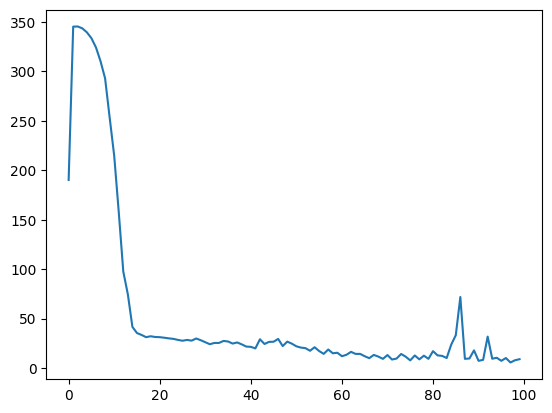

In [19]:
#
import matplotlib.pyplot as plt
plt.plot(loss_history)

In [20]:
test=df.iloc[66]['text']
print(test)

Yesterday Italy released a test-version of a contact tracing App called 'Immuni' in four regions of the country that was hardest hit with COVID-19 before extending it to the whole country. Specifically, the four regions include Liguria , Abruzzo , Marche and Puglia.
Reportedly there has been widespread resistance from people concerned about invasion of privacy, though they shouldn't be because the app is is based on software from Apple and Google where privacy is the cornerstone of their software. The Apple|Google announcement specifically has a segment titled " Privacy-Preserving Contact Tracing ."
The privacy features are so good that it has angered France and other countries and even some U.S. States that want their contact tracing app to have far less privacy.
We reported on this back on May 13: While that issue may anger some 'governments ,' Apple and Google purposely designed their standards that way in fear that governments could possibly abuse the collected data for other nefar

In [21]:
# create the test article
news_article = test
# Process the test article text with my custom NER model
doc = custom_ner(news_article)

# Extract entities in (entity, label) tuple format
entities = [(ent.text, ent.label_) for ent in doc.ents]


In [22]:
# Print the entities in (entity, label) format
for entity, label in entities:
    print(f"{entity}: {label}")


Yesterday: ORG
Liguria: ORG
Abruzzo: ORG
Apple: ORG
Google: ORG
Apple|Google: ORG
Apple: ORG
Google: ORG
Wuhan Virus: ORG
EMG Acqua on: ORG
Bending Spoons: ORG


In [23]:
#visualize named entities
displacy.render(doc, style="ent", jupyter=True)